# Progetto: Previsione consumi elettrici del Trentino 
## Corso: Introduzione alla Data Science
### Autori: Puleo Gianmarco, Saiani Anna

## Obiettivi del progetto:  
### Usando i dati relativi ai consumi elettrici, le previsioni meteo ed inquinamento abbiamo sviluppato le seguenti richieste : 


### 1. Exploratory Data Analysis (EDA) 


### 2. Classificazione e previsione fasce di consumo zone urbane di Trento 


### 3. Regressione e previsione consumi Provincia di Trento e Comune di Trento 



## Obiettivi del progetto:  
Usando i dati relativi ai consumi elettrici, meteo ed inquinamento abbiamo sviluppato le seguenti richieste : 

1. Attraverso tecniche di Exporatory Data Analysis (EDA) abbiamo indivisuato le zone della Provincia Autonoma di Trento che presentano i maggiori consumi e variazioni significative fra giorno e notte e fra giorni feriali e festivi. 


2. Classificazione e previsione fasce di consumo zone urbane di Trento. Una volta diviso il territorio urbano di Trento in 2 zone abbiamo usato degli algoritmi di classificazione per cercare di prevedere qualitativamente i consumi infrasettimanali (alto, medio, basso) dal giorno prima al giorno successivo per ciascuna zona. 


3. Regressione e previsione consumi Provincia di Trento e Comune di Trento. Attraverso algoritmi di regressione abbiamo cercato di prevedere quantitativamente i consumi di energia per l'intera provincia di Trento e per la zona centrale del comune di Trento. 



In [1]:
import sys
sys.path.append('../')
sys.path.append('../src')
import src.visualization.EDA_Trento as EDA
import src.visualization.mappe as maps
import src.visualization.plotregression as pltreg
import src.visualization.classificazione as pltcla
import src.visualization.EDA_provincia as EDAprov
import warnings
warnings.filterwarnings('ignore')

Dati meteo importati correttamente!
Dati consumi importati correttamente!
Dati inquinamento importati correttamente!


/home/gianmarco/anaconda3/envs/DS_2022/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Assunzioni e semplificazioni
#### - Il territorio trentino è diviso in celle di circa (300m x 300m). Per ciascuna di esse abbiamo informazioni su quali linee elettriche che vi passano. È noto anche il consumo di ogni linea elettrica in intervalli di 10 minuti.
#### - Il fornitore dei dati (<a target="_blank" href="https://www.nature.com/articles/sdata201555">Barlacchi et al.</a>) per motivi di privacy fornisce solo dati mediati sulle intere linee elettriche di riferimento, senza distinzione tra le tipologie di utenza.
#### - Per la regressione e la classificazione sono stati usati solo i giorni infrasettimanali
#### - La regione è stata suddivisa in zone in base alla più vicina stazione meteo
#### - Data la sua rilevanza, solo la zona di Trento centro/sud è stata utilizzata per la regressione, con i dati della stazione meteo Trento Laste.

## 1. Exploratory Data Analysis (EDA)

### EDA : Mappa dei consumi Trentino
La mappa rappresenta i consumi dell'intero mese ed evidenzia il fatto che la zona della città di Trento  caratterizzata da alti consumi.

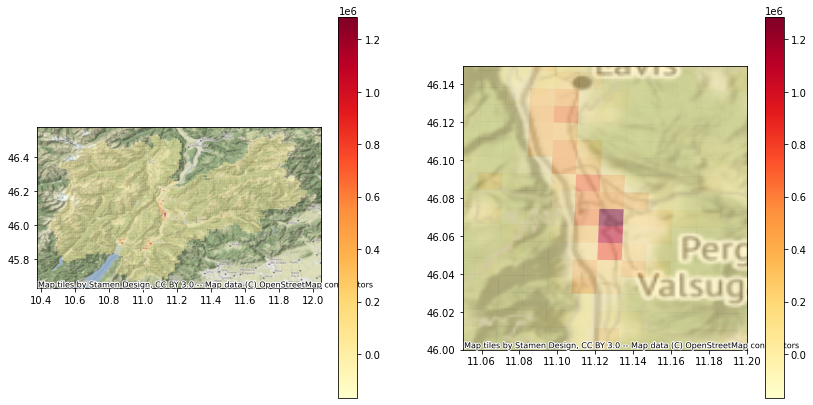

In [2]:
maps.plot_mappa_consumi_lordi()

### EDA: Mappa variazione dei consumi giorno-notte
La mappa rappresenta la variazione dei consumi delle ore diurne rispetto a quelle notturne. 

Le fasce orarie utilizzate in questo caso sono `08:00-19:00` (giorno) e il suo complementare (notte). I consumi sono sommati su tutto il mese. Si è calcolato il consumo orario per ubicazione.

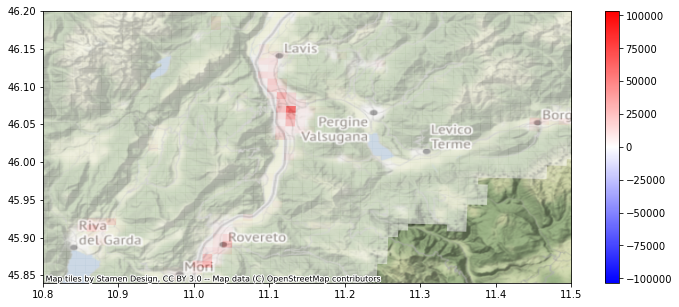

In [3]:
maps.plot_mappa_diff_giorno_notte()

### EDA: Mappa variazione dei consumi settima-weekend
La mappa rappresenta la variazione dei consumi nei giorni lavorativi rispetto al fine settimana

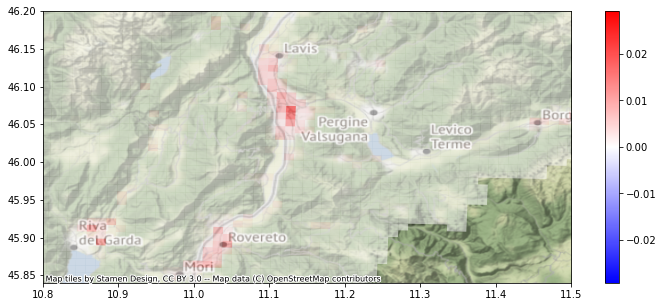

In [4]:
maps.plot_mappa_diff_wknd()

### EDA : Mappe stazioni meteo
Mappe che rappresentano la posizione delle stazioni di rilevazione meteo sul territorio Trentino

Sono disponibili i dati relativi a 36 stazioni meteo sparse sul territorio trentino. Per studiarne la correlazione con i dati dei consumi del comune di Trento, ci limitiamo a considerare le stazioni di Trento Roncafort (zona Trento Nord) e Trento Laste (zona Trento Centro/Sud).

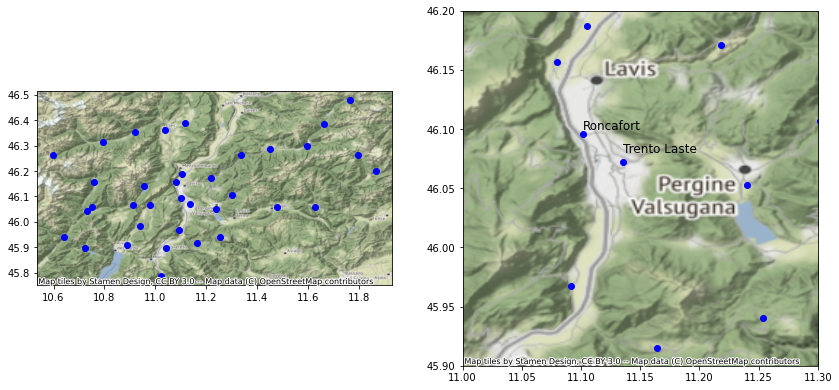

In [5]:
maps.plot_mappa_stazioni()

### EDA : Zone Trentino
Mappa che rappresenta la divisione in zone della provincia di Trento

Ad ogni cella di territorio per cui passa almeno una linea elettrica si associa la più vicina stazione meteo. 
Le celle vengono colorate in base a questa suddivisione.

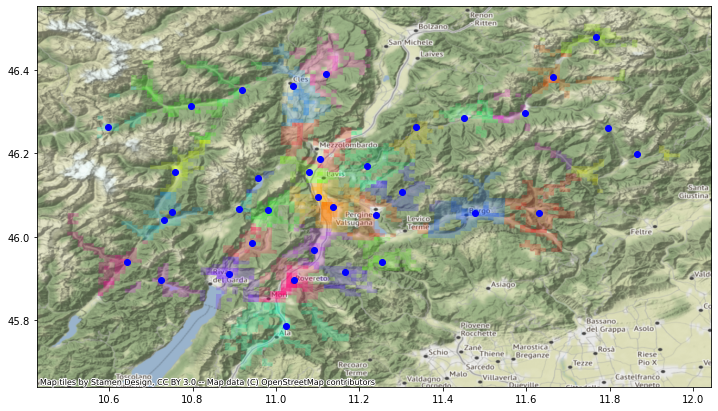

In [6]:
maps.plot_suddivisione_regioni(luogo='provincia')

### EDA : Zone comune di Trento
Mappa che rappresenta la divisione in zone urbane del comune di Trento

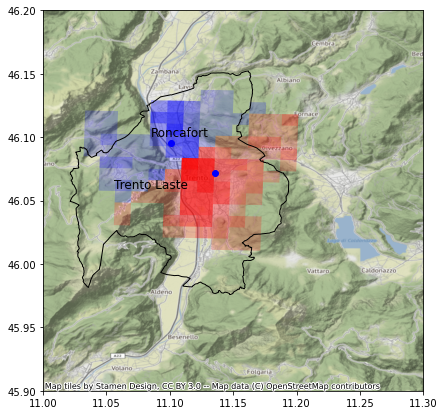

In [7]:
maps.plot_suddivisione_regioni(luogo='comune')

### EDA : Fasce consumi
Istogrammi che rappresentano la distribuzione dei consumi relativi alle due zone di Trento individuate registrati nell'arco di due mesi 

La zona Roncafort (Trento nord) presenta evidentemente consumi maggiori. Questo è probabilmente dovuto alla maggiore presenza industriale nell'area.

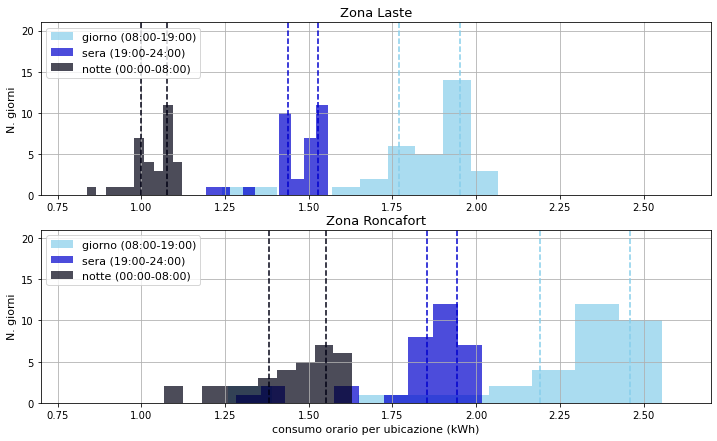

In [2]:
EDA.histplotconsumi()

### EDA : Correlazioni
Matrice di covarianza features utilizzate per la classificazione delle zone di Trento 

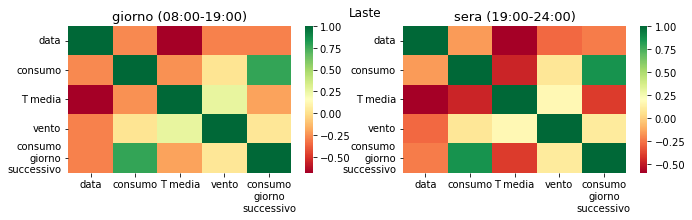

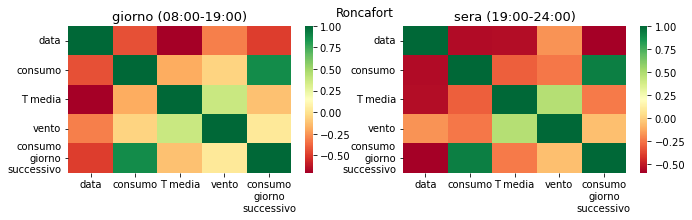

In [2]:
EDA.edaConsumiZoneTrento(mode="corr")

### EDA: Stagionalità 
Grafico che evidenzia la stagionalità dei consumi nelle due zone di Trento

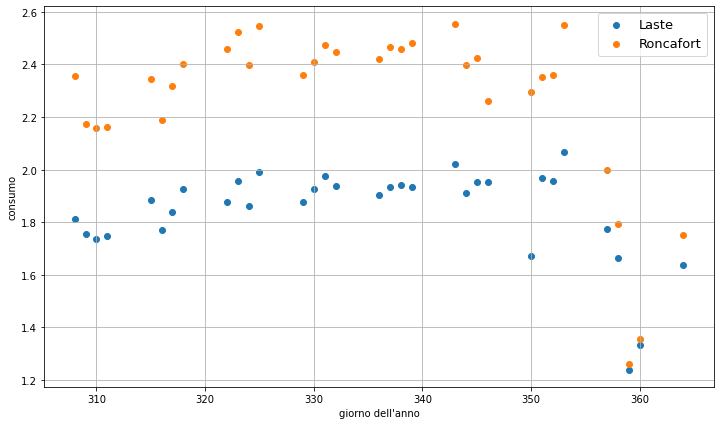

In [3]:
EDA.edaConsumiZoneTrento(mode="season")

### EDA: Matrice di correlazione database Provincia di Trento
Matrice che rappresentano i coefficienti di correlazione di pearson su tutte le features.

Le diverse stazioni dell'inquinamento sono indicate con diverse lettere. 
+ A Trento S. Chiara
+ B Trento Via Bolzano
+ C Rovereto
+ D Borgo Valsugana

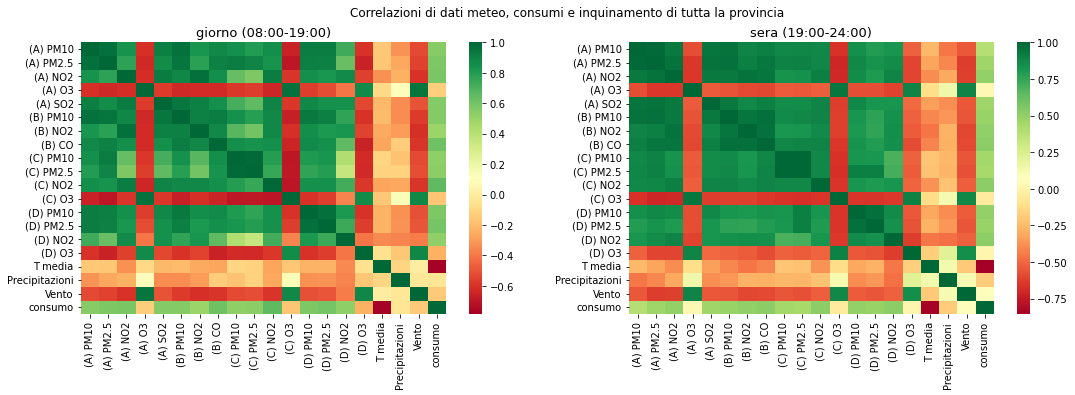

In [11]:
EDAprov.corrMatrix()

### EDA:  Esempio di correlazioni fra features
Scatter plot che rappresenta visivamente le correlazioni tra alcune delle features rappresentate precedentemente.

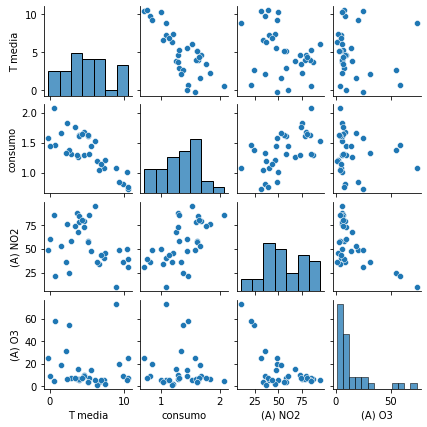

In [12]:
EDAprov.corrPlots()

## 2. Classificazione 
### - Random Forest
### - Neural Network
### - Logistic Regression Classifier

### Classificazione - Random Forest
#### Confusion matrix Train

Performance del classificatore RF sull'insieme train.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.96
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.98


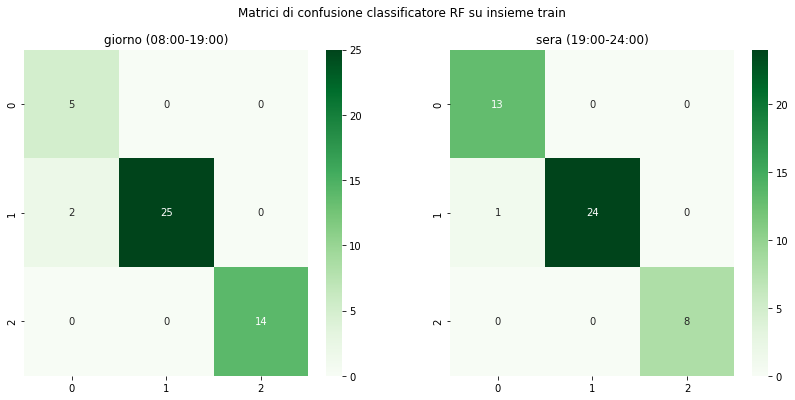

In [13]:
pltcla.confMat(classifier_name = "RF", subset="train")


### Classificazione - Random Forest
#### Confusion matrix Test

Performance del classificatore RF sull'insieme test.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.7
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.8


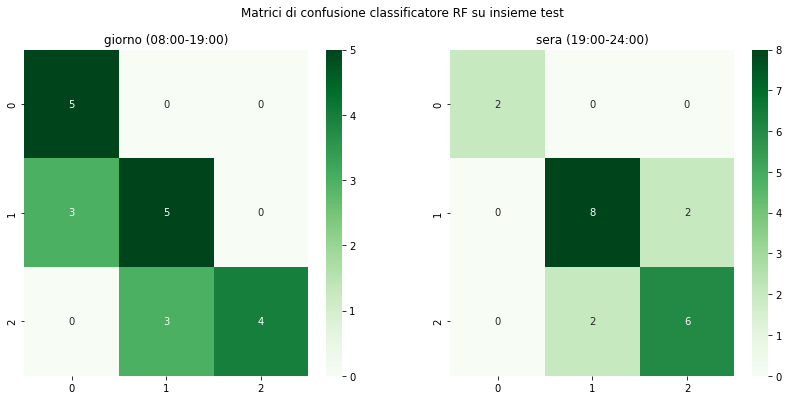

In [14]:
pltcla.confMat(classifier_name = "RF", subset="test")

### Classificazione - Neural Network
#### Confusion matrix Train

Performance del classificatore NNW sull'insieme train.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.65
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.61


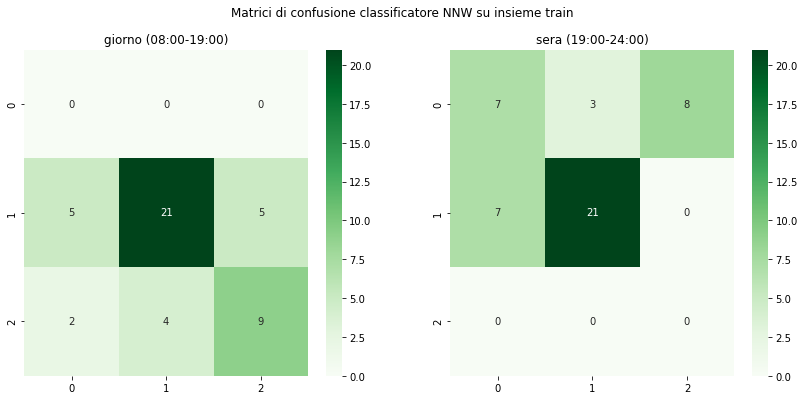

In [15]:
pltcla.confMat(classifier_name = "NNW", subset="train")


### Classificazione - Neural Network
#### Confusion matrix Test

Performance del classificatore NNW sull'insieme test.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.3
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.4


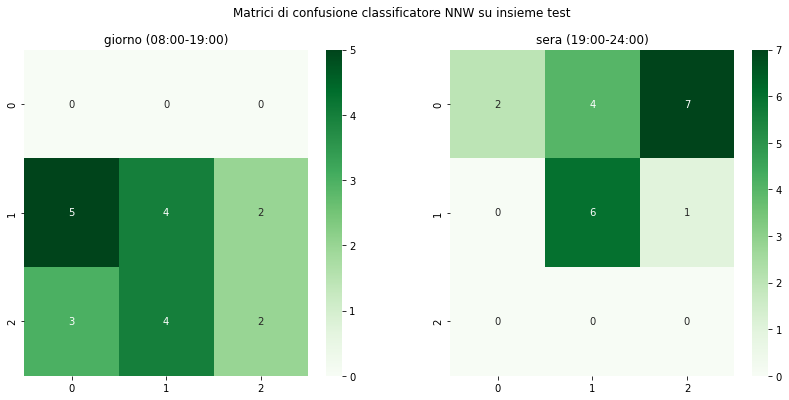

In [16]:
pltcla.confMat(classifier_name = "NNW", subset="test")

### Classificazione - Logistic Regression Classifier
#### Confusion matrix Train

Performance del classificatore LR sull'insieme train.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.89
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.8


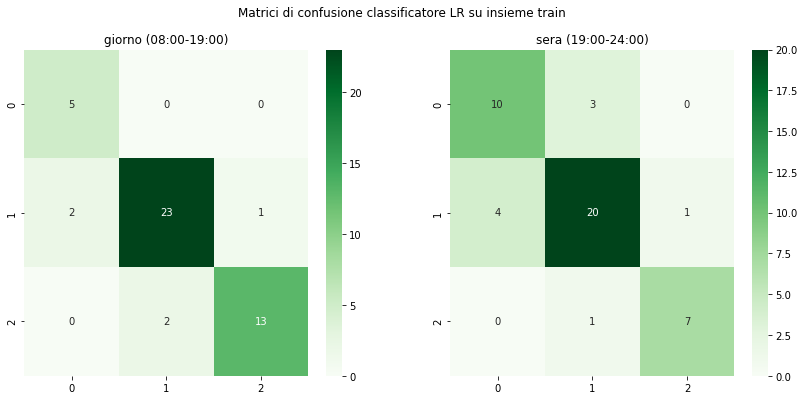

In [17]:
pltcla.confMat(classifier_name = "LR", subset="train")


### Classificazione - Logistic Regression Classifier
#### Confusion matrix Train

Performance del classificatore LR sull'insieme test.
Lo score sui dati della fascia oraria giorno (08:00-19:00) è 0.7
Lo score sui dati della fascia oraria sera (19:00-24:00) è 0.7


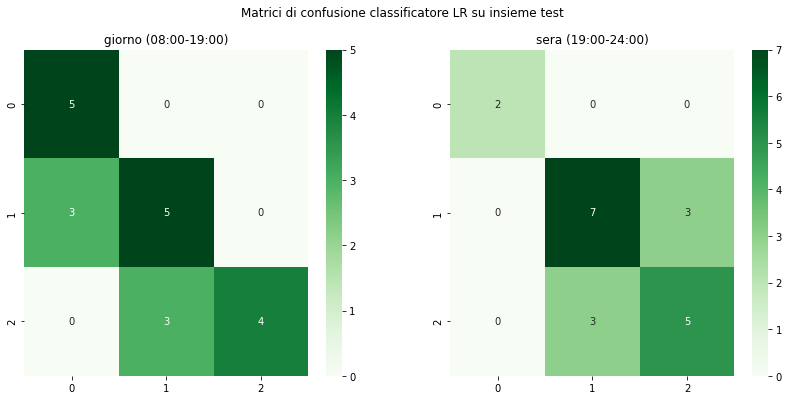

In [18]:
pltcla.confMat(classifier_name = "LR", subset="test")

## 3. Regressione

### Regressione - Score e features 

Grafico che mostra gli score della regressione sul database dei consumi diurni dell'intera provincia.

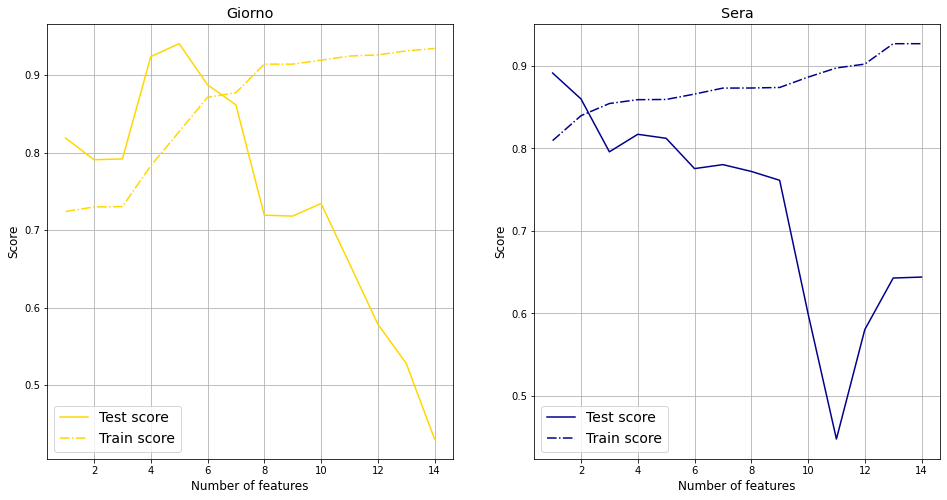

In [19]:
pltreg.plotregr()

## Conclusioni
* Esistono delle zone in cui ci sono evidenti variazioni dei consumi fra notte e giorno e fra settimana e week-end e queste correlano molto bene con le zone più densamente abitate della Provincia. 
* All'interno del comune di Trento, la zona di Trento Nord presenta consumi più alti, si tratta infatti di una zona maggiormente industriale. 
* il miglior classificatore tra quelli utilizzati sembra il logistic regressor classifier in quanto ha risultati simili su train e test. Essendo un modello più semplice rispetto a una rete neurale e a una Random Forest, il rischio di overfit è ridotto.
* un modello troppo complesso (con tante features) per la regressione provoca un calo dello score della stessa sull'insieme di test.

## Sviluppi futuri 

* Capire meglio come affrontare il problema della stagionalità

* Riuscire a migliorare la categorizzazione e la regressione utilizzando non più un solo giorno precedente, ma diversi giorni precedenti 

* Trovare parametri ottimali per classificatori (modelli troppo complessi portano a overfit, modelli troppo semplici non imparano molto)

* Pensare di dividere il territorio urbano di Trento in zone riferite alle principali circoscrizioni

* Fare un analisi delle correlazioni meteo-consumi a livello locale, cioè per ogni territorio associato a ciascuna stazione meteo.
